In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class Grid():
    def __init__(self):
        # INPUTS
        self.average_outage_hr_per_day = 8
        self.average_outage_hr_per_day_stdev = 5 # hoping to find the value from the smart meters
        self.min_outage_hr_per_day = 5
        self.max_outage_hr_per_day = 11

        #grid comes online during day hours
        self.day_start_time = 10 # normal time when the grid comes online
        self.day_end_time = 16 # normal time when the grid goes offline

        #grid also comes online during evening/night hours
        self.night_start_time = 19
        self.morning_end_time = 4 #the next day 4 am

        #grid status for 24 hours in a day, initally grid is offline for 24 hours
        
        self.grid_status = [0 for i in range(0,24)]

        self.size =1
        
    def update_grid_status(self):
        outage_hr_per_day = round(abs(np.random.normal(self.average_outage_hr_per_day,  self.average_outage_hr_per_day_stdev,self.size)))
        if outage_hr_per_day < self.min_outage_hr_per_day:
            outage_hr_per_day = self.min_outage_hr_per_day    
        if outage_hr_per_day > self.max_outage_hr_per_day:
            outage_hr_per_day = self.max_outage_hr_per_day    
        
        # if grid is offline at particular hour then grid status at that hour = 1 [ but this notation is revesed later]
        for i in range(0,24):
            if self.morning_end_time < i < self.day_start_time:
                self.grid_status[i] = 1 
            if self.day_end_time < i < self.night_start_time:
                self.grid_status[i] = 1 

    #         print 'outage grid',outage_hr_per_day
        if sum(self.grid_status) < outage_hr_per_day:
            while sum(self.grid_status) <= outage_hr_per_day:
                off_hr = np.random.randint(0,24)
                self.grid_status[off_hr] = 1
                
#         invert the notation from off grid status = 1 / on grid status = 0 --> off grid status = 0 / on grid status = 1
        for i in range(0,24):
            if self.grid_status[i] == 1: self.grid_status[i] = 0
            else: self.grid_status[i] = 1             
        return self.grid_status
    

class simulation():
    def __init__(self):
        self.no_of_simulation = 10
    
    def yearly_grid_status(self):
        grid_status = []
        for i in range(0,365):
            gs = Grid().update_grid_status()
            grid_status.append(gs)
        return pd.DataFrame(grid_status)
    
    def monte_carlo_grid_simulation(self):
        dict_of_df = {}
        for n in range(0,self.no_of_simulation):
            name = 'Sim' + str(n)
            df_g = self.yearly_grid_status()
            dict_of_df[name] = pd.DataFrame(df_g)
        panel_village_load = pd.Panel(dict_of_df)
        return panel_village_load
        


In [12]:
grid_sim = simulation().monte_carlo_grid_simulation()
print grid_sim

<class 'pandas.core.panel.Panel'>
Dimensions: 10 (items) x 365 (major_axis) x 24 (minor_axis)
Items axis: Sim0 to Sim9
Major_axis axis: 0 to 364
Minor_axis axis: 0 to 23


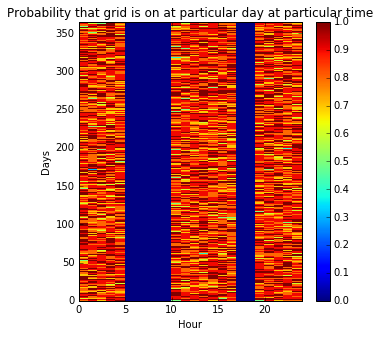

In [25]:
plt.figure(figsize=(5,5))
plt.pcolor(grid_sim.mean(0))
plt.colorbar()
plt.title("Probability that grid is on at particular day at particular time")
plt.ylabel("Days")
plt.xlabel("Hour")
plt.show()
%matplotlib inline

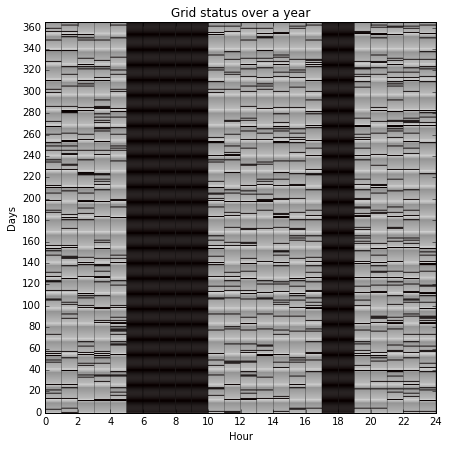

<function __main__.plt_grid_sim>

In [43]:
from IPython.html.widgets import *
%matplotlib inline
sim_keys = [sim_name for sim_name in grid_sim.keys().values]
def plt_grid_sim(sim_name):
    plt.figure(figsize=(7,7))
    plt.pcolor(grid_sim[sim_name],cmap='hot',edgecolor='k')
    plt.title("Grid status over a year")
    plt.ylabel("Days")
    plt.xlabel("Hour")
    plt.show()
interact(plt_grid_sim, sim_name=sim_keys)

['Sim0',
 'Sim1',
 'Sim2',
 'Sim3',
 'Sim4',
 'Sim5',
 'Sim6',
 'Sim7',
 'Sim8',
 'Sim9']

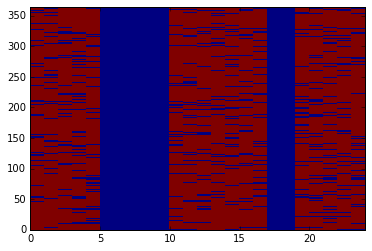